## Importing Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
import csv
import matplotlib.cm as cm
import time
import math
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from warnings import filterwarnings
filterwarnings(action='ignore')
random_seed = int(time.time())

## Loading Dataset

## Description

## Finding Null Values

## Feature Engineering

## Data Analysis

## Prepare the engineered features

## Model Training

In [ ]:
# We train an additional individual Random Forest and Decision Tree models to show feature importance
print("\nRandom Forest Classifier:")
rf_model = RandomForestClassifier(random_state=random_seed)
rf_model.fit(X_train, y_train)

## Model Comparison

#### We choose DecisionTreeClassifier since it is the fastest and provides an accuracy of 100%. (We checked that this is not overfitting)

## Feature Importance

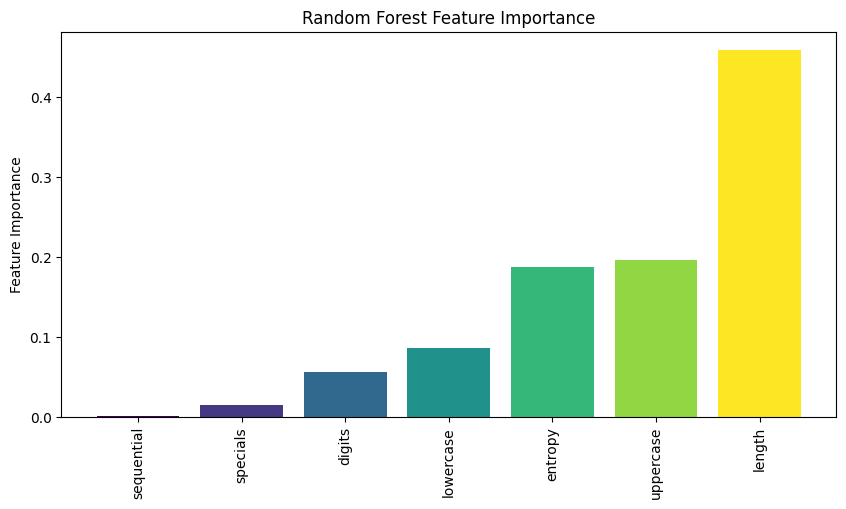

In [35]:
# Get the feature importances and sort them
rf_importances = rf_model.feature_importances_
features = X_engineered.columns
sorted_indices = np.argsort(rf_importances)[::-1]  # Sort in descending order

# Sort features and their importances
sorted_features = np.array(features)[sorted_indices]
sorted_importances = rf_importances[sorted_indices]

# Create a colormap for the bars
colors = cm.viridis(np.linspace(0, 1, len(sorted_importances)))

# Plot the sorted feature importances, with the graph standing up
plt.figure(figsize=(10, 5))
plt.bar(sorted_features[::-1], sorted_importances[::-1], color=colors)
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

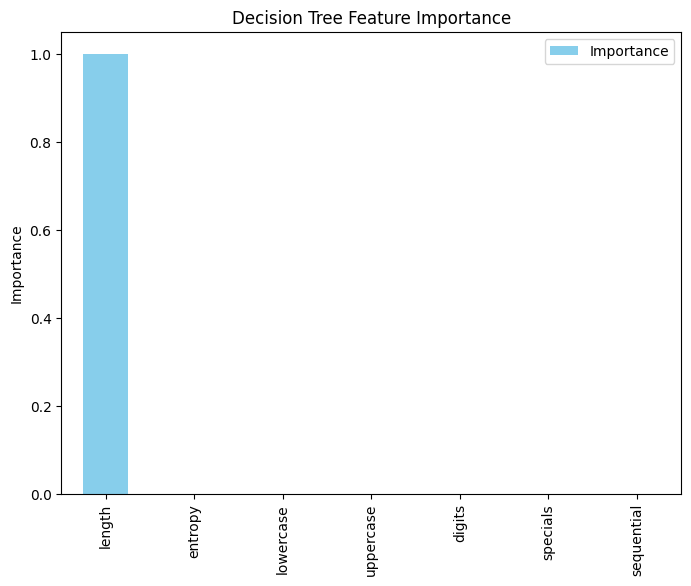

In [36]:
# Get the feature importances from the Decision Tree model
feat_importances = pd.DataFrame(dt_model.feature_importances_, index=X_engineered.columns, columns=["Importance"])

# Sort the feature importances in descending order
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances as a bar chart
feat_importances.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Decision Tree Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

#### We can see that length dominates the other features. What if we did not use it?

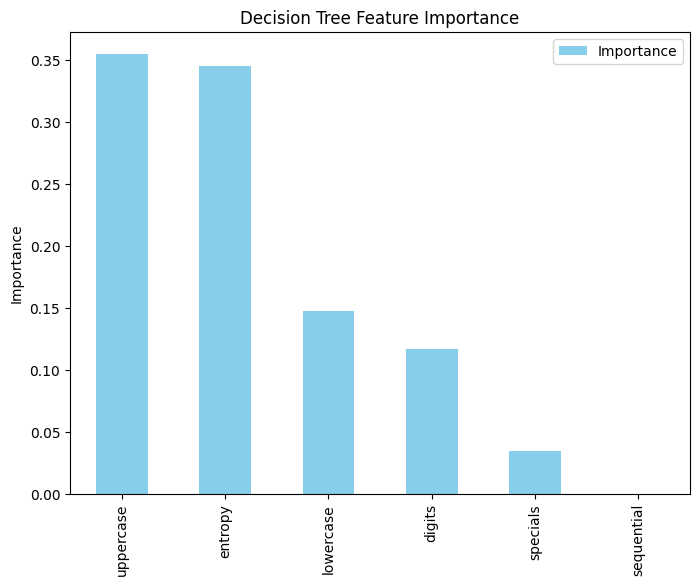

In [37]:
# Get the feature importances from the Decision Tree model without the 'length' feature.
feat_importances = pd.DataFrame(dt_model_nl.feature_importances_, index=X_engineered_nl.columns, columns=["Importance"])

# Sort the feature importances in descending order
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances as a bar chart
feat_importances.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Decision Tree Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

#### Feature Importance for Passwords Classified as "strong"

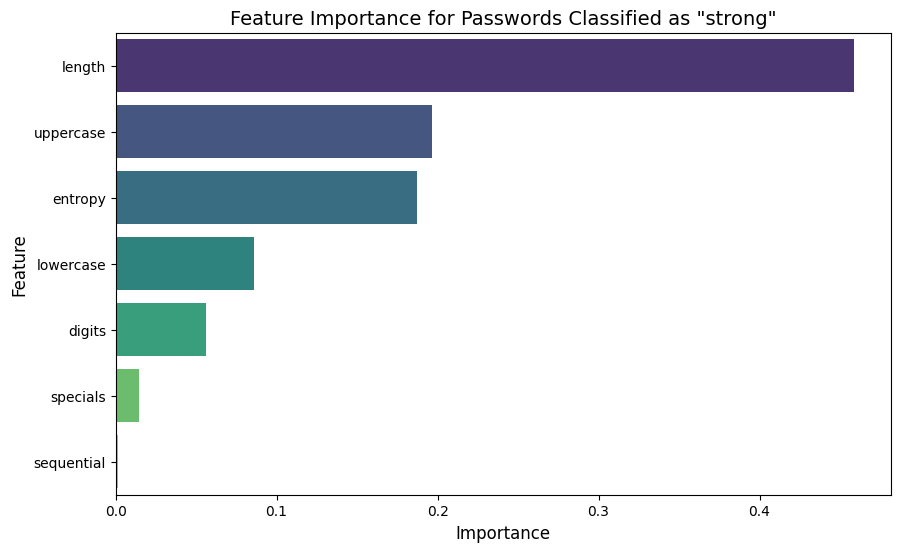

In [38]:
# Filter the data to get the passwords classified as 2
X_class_2 = X_train[y_train == 2]

# Get the feature importances from the RandomForest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization of features and their importance
importance_df = pd.DataFrame({
    'Feature': X_class_2.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Set plot labels and title
plt.title('Feature Importance for Passwords Classified as "strong"', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.show()

#### We can derive from this graph that 'length', 'uppercase' and 'entropy' are the most important features to a password 